(ref:lec1:ex1)=
# Exercise 1.1


```{figure} res/ex1.png
:align: center

Schematic of the motor (courtesy of [*Exercise Manual for Automatic Control*](https://uppsala.instructure.com/courses/102131/files/7991063?module_item_id=1296223))
```

The scheme above is a DC motor  characterized by the following physical relationships. The rotating axis is described by 

$$J\ddot{\theta} = -f\dot{\theta} + M,$$

where $\theta$ is the angle of rotation, $M$ is the torque, $J$ is the angular momentum, and $f$ is the frictional coefficient. 

The torque is related to the stator current by the following relationship

$$M = k_a i$$

where $i$ is the stator current and  $k_a$ is a proportional constant characteristic for the motor. In addition, 

$$v = k_v\dot{\theta}$$

where $v$ is the induced voltage of the motor and $k_v$ is a known proportional constant. 

Let the input voltage $u$ be the control signal and $\theta$ be the output. 

1. Write a differential equation that relates $u$ and $\theta$ (the inductance $L_a$ can be neglected) in the Laplace domain.
2. Determine the transfer function  between the input and the output. 
3. Discuss the behavior of the system by calculating step response of the system. That is, $\theta(t)$ when $u = \textrm{step}(t)$.

```{admonition} Hint 1
:class: dropdown

To get the relationship between the voltage $u$ and the current flowing through the motor, we can apply Ohm's law:

$$
u(t) = R_a i(t) + L_a \frac{d}{dt} i(t) + v(t)
$$ (eq:lec1:ex1:ohm)

Note that $L_a \frac{d}{dt} i(t)$ is the voltage drop at the pins of the inductance, see Equation (1) of [this page](https://en.wikipedia.org/wiki/Inductance#Source_of_inductance).
```

```{admonition} Hint 2
:class: dropdown

To get the transfer function between the input and the output, the balance of momentum needs to be applied:

$$ 
J \ddot{\theta} = -f_s \dot{\theta} + M =  -f_s \dot{\theta}  + k_a i(t)
$$ (eq:lec1:ex1:momentum)

where:
- $J \ddot{\theta}$ is the angular intertia ($\ddot{\theta} = \frac{d^2}{dt^2}\theta$ is the angular acceleation)
- $-f_s \dot{\theta}$ is the friction term, proportional to the angular velocity
- $M = k_a i(t)$ is the force applied by the motor, proportional to the current $i(t)$ flowing throught the motor.

```

----

## Solution

In the Laplace domain, the time derivative operator is equivalent to multiplying by $s$. Hence, $\frac{d}{dt} i(t) \rightarrow s I(s)$ and $\frac{d}{dt} \theta(t) \rightarrow s \Theta(s)$.

### Question 1
From the Ohm's law {eq}`eq:lec1:ex1:ohm`, we have that $U(s) = R_a I(s) + L_a s I(s) + k_v s \Theta(s)$.
Solving by $I(s)$, and recalling that $L_a = 0$, we get

$$
I(s) = \frac{U(s)}{R_a} - \frac{k_v s}{R_a} \Theta(s)
$$


### Question 2
Moving the balance of momentum from the time domain, equation {eq}`eq:lec1:ex1:momentum` to the Laplace domain we get

$$
J s^2 \Theta(s) = -f_s \Theta(s)  + k_a I(s)
$$

Replacing the expression of $I(s)$ we get

$$
J s^2 \Theta(s) + f_s s \Theta(s) =  k_a \left( \frac{U(s)}{R_a} - \frac{k_v s}{R_a}\Theta(s) \right)
$$

We then isolate $\Theta(s)$:

$$
\Theta(s) = \frac{\frac{k_a}{R_a}}{s^2 J + \left(f_s + \frac{k_a k_v}{R_a}\right)s} U(s)
$$

The transfer function is therefore

$$
\Theta(s) =  \frac{k_o}{s \left(s + \alpha\right)} U(s)
$$ (eq:lec1:ex1:theta)

where $k_o = \frac{k_a}{R_a J}$ and  $\alpha = \frac{f_s + \frac{k_a k_v}{R_a}}{J}$.

**Note**: the ODE describing the evolution of the angle can be derived as

$$s(s+\alpha) \Theta(s) = k_o U(s) \quad \rightarrow \quad \frac{d^2}{d t^2} \theta(t) + \alpha \frac{d}{d t} \theta(t) = k_o u(t)$$

### Question 3

We can get a qualitative idea of the step response  by looking at the static gain and poles of the transfer function {eq}`eq:lec1:ex1:theta`.

We compute the **poles** as the roots of the denominator, i.e. by solving $s(s+\alpha) = 0$. We have two poles:

- $s=-\alpha < 0$, which is stable.
- $s = 0$, which is only marginally stable. This pole is due to the fact that the angular position $\theta(t)$ is the integral of the angular velocity $\dot{\theta}(t)$. In the Laplace domain, this corresponds to $\Theta(s) = \frac{1}{s} \dot{\Theta}(s)$.

Because the assumption of the Final Value Theorem are **not satisfied** (not all the poles are stable, that is, not all the poles have strictly negative real part), **we cannot apply it** to compute $\lim_{t \to \infty} \theta(t)$.

Whether such a limit exists and is finite depends on the specific input $u(t)$ applied to the system. We can get the output by computing the output $\Theta(s)$ in the Laplace domain, and then anti-transforming it to get $\theta(t)$.

Noting that $U(s) = \mathcal{L} \left[ \textrm{step}(t) \right] = \frac{1}{s}$, we get

$$
\Theta(s) = \frac{k_o}{s(s+\alpha)} \frac{1}{s} = \frac{k_o}{s^2(s+\alpha)}
$$

We then decompose it into the sum of simpler rational transfer functions

$$
\Theta(s) = \frac{A}{s} + \frac{B}{s} + \frac{C}{s+\alpha}
$$

The values of $A$, $B$, and $C$ are found equating the two expressions of $\Theta(s)$:

$$
\frac{A}{s} + \frac{B}{s^2} + \frac{C}{s+\alpha} = \frac{As(s+\alpha) + B(s+\alpha) + C s^2}{s^2(s+\alpha)} = \frac{(A+C)s^2 + (A \alpha + B)s + B \alpha}{s^2(s+\alpha)} = \frac{k_o}{s^2(s+\alpha)}
$$

$A$, $B$, and $C$ can be found by comparing the coefficients of the polynomial at the numerator, which results in a linear system of equations

$$
\left\{ \begin{array}{l}
    A + C = 0 \\
    A \alpha + B = 0 \\
    B \alpha = k_o \end{array} \right. \quad \Rightarrow \quad A = - \frac{k_o}{\alpha^2}, B = \frac{k_o}{\alpha}, C = \frac{k_o}{\alpha^2}
$$

We can therefore re-write $\Theta(s)$ as 

$$
\Theta(s) = \frac{A}{s} + \frac{B}{s^2} + \frac{C}{s+\alpha}
$$

This allows us to easily anti-transform $\Theta(s)$

$$
\begin{aligned}
\theta(t) =& \mathcal{L}^{-1}\left[ \Theta(s)  \right] = \mathcal{L}^{-1}\left[ \frac{A}{s}  \right] + \mathcal{L}^{-1}\left[ \frac{B}{s^2}  \right] + \mathcal{L}^{-1}\left[ \frac{C}{s+\alpha}  \right]\\
=& A \cdot \textrm{step}(t) + B \cdot \textrm{ramp}(t) + C \cdot e^{-\alpha t} \textrm{step}(t)
\end{aligned}
$$

Note that $\lim_{t \to \infty} \theta(t) = \infty$.

Let's use MATLAB (Octave) to plot the step response (we will take $\alpha=1$ and $k_o=1$ since numerical values are not provided in the text of the exercise).

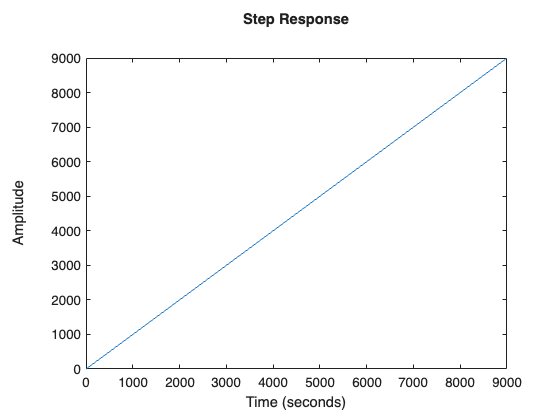

In [1]:
s = tf('s');
G = 1 / (s * (s + 1));

step(G);     % Get the step response of the transfer function G

```{admonition} Remember
:class: note
Before applying the Final Value Theorem, always check that its assumptions are satisfied! 
```